# Series Temporais

In [3]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
# Registro de Conversor para o uso do matplot
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
# Carregando a base de dados
base = pd.read_csv('AirPassengers.csv')
base.head()
base.shape

(144, 2)

In [5]:
# Visualizar o tipo de dados dos tributos, isso é importante para que seja reconhecido o os periodos para ser feita a serie temporais.
print(base.dtypes)

Month          object
#Passengers     int64
dtype: object


In [6]:
# Conversão dos atributos que estão em formato string para o formato Data: ANO-MÊS
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'],
                  index_col = 'Month', date_parser = dateparse)
base

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [7]:
# Visualização do indice do Dataframe (#Passengers)
base.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [8]:
# Criação de uma Serie Temporal (TS)
ts = base['#Passengers']
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

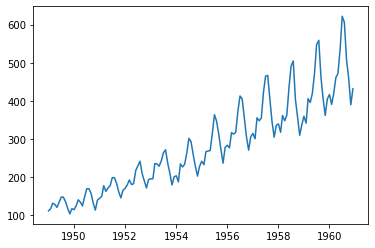

In [9]:
# Visualizar a serie temporal completa
plt.plot(ts)

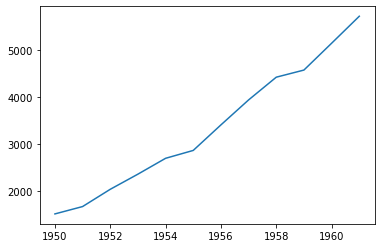

In [10]:
# Visualizar a serie temporal por ano
ts_ano = ts.resample('A').sum()
plt.plot(ts_ano)

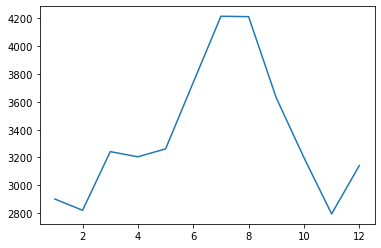

In [11]:
#Visualizar por mês
ts_mês = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mês)

# Decomposição

In [12]:
# Importando Biblioteca
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
# Decomposição da serie temporal, criando uma variavel para cada formato 
decomposicao = seasonal_decompose(ts)

In [14]:
# Tendencia
tendencia = decomposicao.trend

In [15]:
# Sazonalidade 
sazonalidade = decomposicao.seasonal

In [16]:
#Randomico
aleatorio = decomposicao.resid

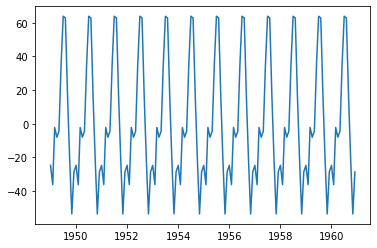

In [17]:
# Visualização de graficos para cada formato da serie temporal
plt.plot(sazonalidade)

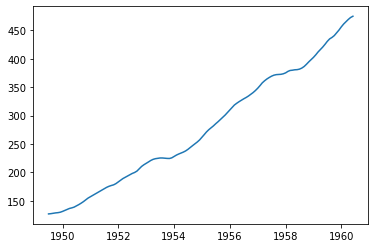

In [18]:
plt.plot(tendencia)

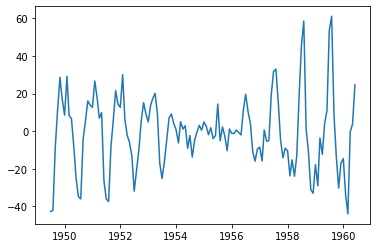

In [19]:
plt.plot(aleatorio)

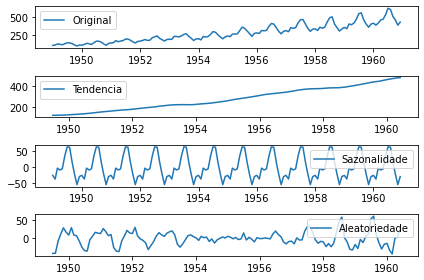

In [20]:
# Visualizar todos os graficos em conjunto.

# Tabela original
plt.subplot(4,1,1)
plt.plot(ts, label = 'Original')
plt.legend(loc = 'best')

# Tabela Tendencia
plt.subplot(4,1,2)
plt.plot(tendencia, label = "Tendencia")
plt.legend(loc = 'best')

# Tabela Sazonalidade
plt.subplot(4,1,3)
plt.plot(sazonalidade, label = "Sazonalidade")
plt.legend(loc = 'best')

# Tabela Aleatoriedade
plt.subplot(4,1,4)
plt.plot(aleatorio, label = "Aleatoriedade")
plt.legend(loc = 'best')
plt.tight_layout()

# Previsões com ARIMA

In [21]:
# Importação das Biblioteca Arima

from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

In [22]:
# Clear console
import warnings
warnings.filterwarnings("ignore")
# Criação do modelo ARIMA com os parametros p=2, q=1, d=2, treinamento e visualização dos Resultados
modelo = ARIMA(ts, order=(2, 1, 2),freq=ts.index.inferred_freq)
modelo_treinado = modelo.fit()
modelo_treinado.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.715
Date:                Wed, 17 Nov 2021   AIC                           1344.043
Time:                        17:23:37   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5308      0.708      3.573      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.932      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9097      0.065    -29.505      0.000      -2.037      -1.783
ma.L2.D.#Passengers     0.9996      0.068     14.806      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9553           -0.2965j            1.0002           -0.0479
MA.2            0.9553           +0.2965j            1.0002            0.0479
-----------------------------------------------------------------------------
"""

In [23]:
# Pevisões de 12 datas no futuro.
previsoes = modelo_treinado.forecast(steps = 12)[0]
previsoes

array([433.12722135, 450.90577084, 479.83684249, 512.00144489,
       539.35195269, 555.8296861 , 558.7701479 , 549.29273564,
       531.66496307, 511.90048066, 496.0271932 , 488.50856987])

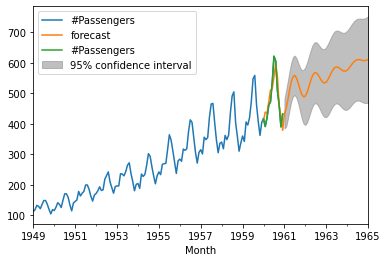

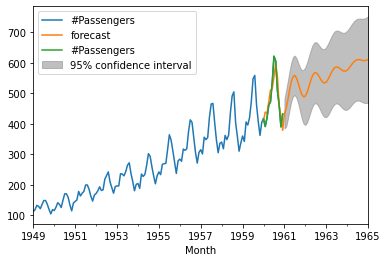

In [25]:
# Criação de eixo para completo da serie original mais a previsão 
#plot_insample =TRUE dados Originais
eixo = ts.plot()
modelo_treinado.plot_predict('1960-01-01', '1965-01-01',
                            ax= eixo, plot_insample = True)


In [28]:
# Implementação do AUTOARIMA
modelo_auto = auto_arima(ts, m=12, seasonal = True, trace = False)
modelo_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Wed, 17 Nov 2021   AIC                           1017.847
Time:                                     18:00:03   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.602      0.000      -1.057      -0.907
sigma2       129.3132     14.556      8.884      0.000     100.783     157.843
===================================================================================
Ljung-Box (Q):                       47.73   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.19   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
proximos_12 = modelo_auto.predict(n_periods= 12) 
# Visualização dos proximos 12 valores
proximos_12

array([445.6349911 , 420.39510338, 449.19845143, 491.84009559,
       503.39463486, 566.8626126 , 654.26033784, 638.59764662,
       540.88389556, 494.12676856, 423.3328499 , 465.50771009])